In [2]:
import os
import cv2
import numpy as np
import pandas as pd

In [5]:
initial_df = pd.read_csv('./data/data.csv')
initial_df.head()

,Patient,RNASeqCluster,MethylationCluster,miRNACluster,CNCluster,RPPACluster,OncosignCluster,COCCluster,histological_type,neoplasm_histologic_grade,tumor_tissue_site,laterality,tumor_location,gender,age_at_initial_pathologic,race,ethnicity,death01
0,TCGA_CS_4941,2.0,4.0,2,2.0,NaN,3.0,2,1.0,2.0,1.0,3.0,2.0,2.0,67.0,3.0,2.0,1.0
1,TCGA_CS_4942,1.0,5.0,2,1.0,1.0,2.0,1,1.0,2.0,1.0,3.0,2.0,1.0,44.0,2.0,NaN,1.0
2,TCGA_CS_4943,1.0,5.0,2,1.0,2.0,2.0,1,1.0,2.0,1.0,1.0,2.0,2.0,37.0,3.0,NaN,0.0
3,TCGA_CS_4944,NaN,5.0,2,1.0,2.0,1.0,1,1.0,1.0,1.0,3.0,6.0,2.0,50.0,3.0,NaN,0.0
4,TCGA_CS_5393,4.0,5.0,2,1.0,2.0,3.0,1,1.0,2.0,1.0,1.0,6.0,2.0,39.0,3.0,NaN,0.0


In [7]:
dir_df = {
    'Patient_ID': [],
    'Patient_Dir': [],
    'MRI': [],
    'Mask': [],
}


for path in os.listdir('./data/'):
    # skip files
    if path.find('.') != -1:
        continue

    # print(path)
    for _path in os.listdir(os.path.join('./data/', path)):
        if _path.find('_mask') != -1:
            continue

        mri_path = os.path.join('./data/', path, _path)
        mask_path = mri_path[:-4]  + '_mask' + mri_path[-4:]

        dir_df['Patient_ID'].append(path[:12])
        dir_df['Patient_Dir'].append(path)
        dir_df['MRI'].append(mri_path)
        dir_df['Mask'].append(mask_path)


dir_df = pd.DataFrame(dir_df)
dir_df


,Patient_ID,Patient_Dir,MRI,Mask
0,TCGA_CS_4941,TCGA_CS_4941_19960909,./data/TCGA_CS_4941_19960909\TCGA_CS_4941_1996...,./data/TCGA_CS_4941_19960909\TCGA_CS_4941_1996...
1,TCGA_CS_4941,TCGA_CS_4941_19960909,./data/TCGA_CS_4941_19960909\TCGA_CS_4941_1996...,./data/TCGA_CS_4941_19960909\TCGA_CS_4941_1996...
2,TCGA_CS_4941,TCGA_CS_4941_19960909,./data/TCGA_CS_4941_19960909\TCGA_CS_4941_1996...,./data/TCGA_CS_4941_19960909\TCGA_CS_4941_1996...
3,TCGA_CS_4941,TCGA_CS_4941_19960909,./data/TCGA_CS_4941_19960909\TCGA_CS_4941_1996...,./data/TCGA_CS_4941_19960909\TCGA_CS_4941_1996...
4,TCGA_CS_4941,TCGA_CS_4941_19960909,./data/TCGA_CS_4941_19960909\TCGA_CS_4941_1996...,./data/TCGA_CS_4941_19960909\TCGA_CS_4941_1996...
...,...,...,...,...
3924,TCGA_HT_A61B,TCGA_HT_A61B_19991127,./data/TCGA_HT_A61B_19991127\TCGA_HT_A61B_1999...,./data/TCGA_HT_A61B_19991127\TCGA_HT_A61B_1999...
3925,TCGA_HT_A61B,TCGA_HT_A61B_19991127,./data/TCGA_HT_A61B_19991127\TCGA_HT_A61B_1999...,./data/TCGA_HT_A61B_19991127\TCGA_HT_A61B_1999...
3926,TCGA_HT_A61B,TCGA_HT_A61B_19991127,./data/TCGA_HT_A61B_19991127\TCGA_HT_A61B_1999...,./data/TCGA_HT_A61B_19991127\TCGA_HT_A61B_1999...
3927,TCGA_HT_A61B,TCGA_HT_A61B_19991127,./data/TCGA_HT_A61B_19991127\TCGA_HT_A61B_1999...,./data/TCGA_HT_A61B_19991127\TCGA_HT_A61B_1999...


In [8]:
diagnoses = []

for mask in dir_df['Mask']:
    mask = np.max(cv2.imread(mask))
    if mask > 0:
        diagnoses.append(1)
    else:
        diagnoses.append(0)

In [10]:
print(diagnoses[:10])

[0, 0, 1, 1, 1, 1, 1, 1, 1, 1]


In [12]:
dir_df = dir_df.assign(Diagnosis=pd.Series(diagnoses).values)
dir_df

,Patient_ID,Patient_Dir,MRI,Mask,Diagnosis
0,TCGA_CS_4941,TCGA_CS_4941_19960909,./data/TCGA_CS_4941_19960909\TCGA_CS_4941_1996...,./data/TCGA_CS_4941_19960909\TCGA_CS_4941_1996...,0
1,TCGA_CS_4941,TCGA_CS_4941_19960909,./data/TCGA_CS_4941_19960909\TCGA_CS_4941_1996...,./data/TCGA_CS_4941_19960909\TCGA_CS_4941_1996...,0
2,TCGA_CS_4941,TCGA_CS_4941_19960909,./data/TCGA_CS_4941_19960909\TCGA_CS_4941_1996...,./data/TCGA_CS_4941_19960909\TCGA_CS_4941_1996...,1
3,TCGA_CS_4941,TCGA_CS_4941_19960909,./data/TCGA_CS_4941_19960909\TCGA_CS_4941_1996...,./data/TCGA_CS_4941_19960909\TCGA_CS_4941_1996...,1
4,TCGA_CS_4941,TCGA_CS_4941_19960909,./data/TCGA_CS_4941_19960909\TCGA_CS_4941_1996...,./data/TCGA_CS_4941_19960909\TCGA_CS_4941_1996...,1
...,...,...,...,...,...
3924,TCGA_HT_A61B,TCGA_HT_A61B_19991127,./data/TCGA_HT_A61B_19991127\TCGA_HT_A61B_1999...,./data/TCGA_HT_A61B_19991127\TCGA_HT_A61B_1999...,0
3925,TCGA_HT_A61B,TCGA_HT_A61B_19991127,./data/TCGA_HT_A61B_19991127\TCGA_HT_A61B_1999...,./data/TCGA_HT_A61B_19991127\TCGA_HT_A61B_1999...,0
3926,TCGA_HT_A61B,TCGA_HT_A61B_19991127,./data/TCGA_HT_A61B_19991127\TCGA_HT_A61B_1999...,./data/TCGA_HT_A61B_19991127\TCGA_HT_A61B_1999...,0
3927,TCGA_HT_A61B,TCGA_HT_A61B_19991127,./data/TCGA_HT_A61B_19991127\TCGA_HT_A61B_1999...,./data/TCGA_HT_A61B_19991127\TCGA_HT_A61B_1999...,0


In [13]:
# sanity check
pos = cv2.imread(dir_df.iloc[2]['Mask'])
neg = cv2.imread(dir_df.iloc[0]['Mask'])

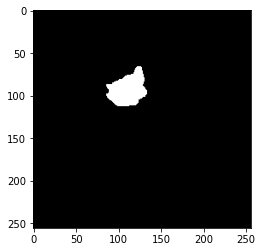

In [14]:
import matplotlib.pyplot as plt
plt.imshow(pos)

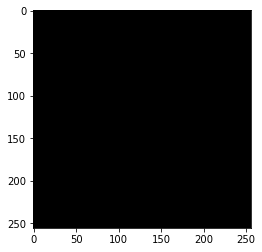

In [15]:
plt.imshow(neg)

In [16]:
dir_df.to_csv('./data/cleaned_data.csv')